In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import requests
import json
import scipy.stats as stats
import pprint as pp
import os
import csv
from sodapy import Socrata

MyAppToken = 'PoLZLhceSUgObx1Disd6WIQS1'

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)

# Example authenticated client (needed for non-public datasets):
client = Socrata('data.cityofchicago.org',
                 MyAppToken,
                 username="stephen.monteiro@northwestern.edu",
                 password="FackeTestPw0rd")

year = [2002, 2010, 2018]

%matplotlib inline


In [51]:
# File Paths
path2010 = "../../Resources/DemoData2010.csv"
path2018 = "../../Resources/DemoData2018.csv"

In [59]:
# Read and clean 2010 DataFrame

demos2010 = pd.read_csv(path2010, skiprows=2)

demos2010 = pd.DataFrame(demos2010)

demos2010.head()


,size 25322


In [12]:


demos2010 = demos2010[["Geog", "GeogKey", "Total Population","Not Hispanic or Latino, White alone", "Not Hispanic or Latino, Black or African American alone", "Not Hispanic or Latino, American Indian and Alaska Native alone", "Not Hispanic or Latino, Asian alone", "Not Hispanic or Latino, Native Hawaiian and Other Pacific Islander alone", "Not Hispanic or Latino, Some Other Race alone", "Not Hispanic or Latino, Two or More Races", "Hispanic or Latino"]]
demos2010 = demos2010.rename(columns = {"Not Hispanic or Latino, White alone": "White",
                                                            "Not Hispanic or Latino, Black or African American alone" : "Black",
                                                            "Not Hispanic or Latino, Asian alone" : "Asian",
                                                            "Not Hispanic or Latino, American Indian and Alaska Native alone" : "Native American",
                                                            "Not Hispanic or Latino, Native Hawaiian and Other Pacific Islander alone" : "Pacific Islander",
                                                            "Not Hispanic or Latino, Some Other Race alone" : "Any Other",
                                                            "Not Hispanic or Latino, Two or More Races" : "Mixed",
                                                            "Hispanic or Latino" : "Hispanic",
                                                            "Geog": "Neighborhood"
                                                           })
#reorder columns to summarize additional races as other
demos2010 = demos2010[["Neighborhood", "Total Population", "White", "Hispanic", "Black", "Asian", "Native American", "Pacific Islander", "Any Other", "Mixed"]]
demos2010['Other']= demos2010.iloc[:, -4:].sum(axis=1)

#combine additional races to other for comparison
demos2010 = demos2010[["Neighborhood", "Total Population", "White", "Hispanic", "Black", "Asian", "Other"]]

demos2010


,Neighborhood,Total Population,White,Hispanic,Black,Asian,Other
0,Rogers Park,54991.0,21618.0,13433.0,14461.0,3523.0,1956.0
1,West Ridge,71942.0,30706.0,14701.0,8015.0,16184.0,2336.0
2,Uptown,56362.0,29098.0,8009.0,11275.0,6414.0,1566.0
3,Lincoln Square,39493.0,24916.0,7562.0,1488.0,4399.0,1128.0
4,North Center,31867.0,24634.0,4330.0,738.0,1449.0,716.0
5,Lake View,94368.0,75845.0,7198.0,3651.0,5653.0,2021.0
6,Lincoln Park,64116.0,53138.0,3571.0,2753.0,3296.0,1358.0
7,Near North Side,80484.0,58033.0,3974.0,8732.0,8140.0,1605.0
8,Edison Park,11187.0,9885.0,872.0,29.0,269.0,132.0
9,Norwood Park,37023.0,30157.0,4442.0,164.0,1696.0,564.0


In [22]:
# Read 2018 DataFrame

demos2018 = pd.read_csv(path2018, skiprows =1)

demos2018 = pd.DataFrame(demos2018)

#  Extract and clean 2000 DataFrame

demos2000 = demos2018[["GEOG", "2000_POP", "2000_WHITE", "2000_HISP", "2000_BLACK", "2000_ASIAN", "2000_OTHER"]]
demos2000 = demos2000.rename(columns = {"GEOG": "Neighborhood", "2000_POP" : "Total Population", "2000_WHITE": "White", "2000_HISP": "Hispanic", "2000_BLACK": "Black", "2000_ASIAN": "Asian", "2000_OTHER": "Other" })

# Clean up 2018 df
demos2018 = demos2018[["GEOG","TOT_POP", "WHITE", "HISP", "BLACK", "ASIAN", "OTHER"]]
demos2018 = demos2018.rename(columns = {"GEOG": "Neighborhood", "TOT_POP" : "Total Population", "WHITE": "White", "HISP": "Hispanic", "BLACK": "Black", "ASIAN": "Asian", "OTHER": "Other" })



In [26]:
#Get gentrified index for filtering

genIndex = pd.read_csv("../../Resources/UIC_gentrification_index_neighborhood_list_final.csv")

genIndex.head()

,No.,Neighborhood,1970,1980,1990,2000,2010,1970-2010,Change,Type
0,77,Edgewater,7,9,9,7,9,2,No Change,1 - Upper Class
1,9,Edison Park,10,9,11,11,11,1,No Change,1 - Upper Class
2,12,Forest Glen,11,11,11,11,9,-2,No Change,1 - Upper Class
3,4,Lincoln Square,9,7,5,11,11,2,No Change,1 - Upper Class
4,13,North Park,9,11,11,11,11,2,No Change,1 - Upper Class


In [28]:
genIndex[['Classification Number','Classification Name']] = genIndex.Type.str.split(" - ",expand=True,)
genIndex.head()

,No.,Neighborhood,1970,1980,1990,2000,2010,1970-2010,Change,Type,Classification Number,Classification Name
0,77,Edgewater,7,9,9,7,9,2,No Change,1 - Upper Class,1,Upper Class
1,9,Edison Park,10,9,11,11,11,1,No Change,1 - Upper Class,1,Upper Class
2,12,Forest Glen,11,11,11,11,9,-2,No Change,1 - Upper Class,1,Upper Class
3,4,Lincoln Square,9,7,5,11,11,2,No Change,1 - Upper Class,1,Upper Class
4,13,North Park,9,11,11,11,11,2,No Change,1 - Upper Class,1,Upper Class


In [29]:
gentrified = genIndex[genIndex["Classification Number"]=="6"]
gentrified = gentrified["Neighborhood"]
gentrified = gentrified.tolist()
gentrified

['Lake View',
 'Lincoln Park',
 'Loop',
 'Near North Side',
 'Near South Side',
 'Near West Side',
 'North Center',
 'Uptown',
 'West Town']

In [30]:
second = genIndex[genIndex["Classification Number"]=="2"]
first = genIndex[genIndex["Classification Number"]=="1"]
fifth = genIndex[genIndex["Classification Number"]=="5"]
combo = [second, first, fifth]


notGentrified = pd.concat(combo)

notGentrified = notGentrified["Neighborhood"]
notGentrified = notGentrified.tolist()

notGentrified

['Beverly',
 'Calumet Heights',
 'Clearing',
 'Dunning',
 'Garfield Ridge',
 'Hyde Park',
 'Irving Park',
 'Jefferson Park',
 'Kenwood',
 'Morgan Park',
 'Mount Greenwood',
 'Norwood Park',
 'Portage Park',
 'West Ridge',
 'Edgewater',
 'Edison Park',
 'Forest Glen',
 'Lincoln Square',
 'North Park',
 'Armour Square',
 'Bridgeport',
 'Logan Square']

In [31]:
#Filter 2000 demographics to see gentrified neighborhoods
gentrifiedDemos2000 = demos2000[demos2000['Neighborhood'].isin(gentrified)]
gentrifiedDemos2000

,Neighborhood,Total Population,White,Hispanic,Black,Asian,Other
37,Lake View,94817.0,75363.0,8268.0,4193.0,5143.0,1850.0
38,Lincoln Park,64320.0,54341.0,3254.0,3323.0,2325.0,1077.0
46,Near North Side,72811.0,50397.0,2805.0,13884.0,4434.0,1291.0
47,Near South Side,9509.0,2393.0,377.0,6052.0,516.0,171.0
48,Near West Side,46419.0,11731.0,4415.0,24546.0,4861.0,866.0
50,North Center,31895.0,21938.0,6496.0,1333.0,1324.0,804.0
65,Loop,16388.0,10169.0,975.0,3221.0,1625.0,398.0
66,Uptown,63551.0,26784.0,12674.0,13415.0,8206.0,2472.0
75,West Town,87435.0,34445.0,40966.0,7979.0,1510.0,2535.0


In [32]:
avgWhite = gentrifiedDemos2000["White"]/gentrifiedDemos2000["Total Population"]*100
avgHisp = gentrifiedDemos2000["Hispanic"]/gentrifiedDemos2000["Total Population"]*100
avgBlack = gentrifiedDemos2000["Black"]/gentrifiedDemos2000["Total Population"]*100
avgAsian = gentrifiedDemos2000["Asian"]/gentrifiedDemos2000["Total Population"]*100
avgOther = gentrifiedDemos2000["Other"]/gentrifiedDemos2000["Total Population"]*100

gentrifiedDemos2000["avgWhite"] = avgWhite
gentrifiedDemos2000["avgHisp"] = avgHisp
gentrifiedDemos2000["avgBlack"] = avgBlack 
gentrifiedDemos2000["avgAsian"] = avgAsian
gentrifiedDemos2000["avgOther"] = avgOther

gentrifiedDemos2000

,Neighborhood,Total Population,White,Hispanic,Black,Asian,Other,avgWhite,avgHisp,avgBlack,avgAsian,avgOther
37,Lake View,94817.0,75363.0,8268.0,4193.0,5143.0,1850.0,79.482582,8.719955,4.422203,5.424133,1.951127
38,Lincoln Park,64320.0,54341.0,3254.0,3323.0,2325.0,1077.0,84.485386,5.059080,5.166356,3.614739,1.674440
46,Near North Side,72811.0,50397.0,2805.0,13884.0,4434.0,1291.0,69.216190,3.852440,19.068547,6.089739,1.773084
47,Near South Side,9509.0,2393.0,377.0,6052.0,516.0,171.0,25.165633,3.964665,63.644968,5.426438,1.798296
48,Near West Side,46419.0,11731.0,4415.0,24546.0,4861.0,866.0,25.271979,9.511192,52.879209,10.472005,1.865615
50,North Center,31895.0,21938.0,6496.0,1333.0,1324.0,804.0,68.781941,20.366829,4.179338,4.151121,2.520771
65,Loop,16388.0,10169.0,975.0,3221.0,1625.0,398.0,62.051501,5.949475,19.654625,9.915792,2.428606
66,Uptown,63551.0,26784.0,12674.0,13415.0,8206.0,2472.0,42.145678,19.943038,21.109031,12.912464,3.889789
75,West Town,87435.0,34445.0,40966.0,7979.0,1510.0,2535.0,39.394979,46.853091,9.125636,1.726997,2.899297


In [33]:
labels = ["White", "Hispanic", "Black", "Asian", "Other"]

In [34]:
#Filter demographics to see gentrified neighborhoods
gentrifiedDemos2018 = demos2018[demos2018['Neighborhood'].isin(gentrified)]
gentrifiedDemos2018

,Neighborhood,Total Population,White,Hispanic,Black,Asian,Other
37,Lake View,99876.0,78859.0,8099.0,3320.0,6735.0,2863.0
38,Lincoln Park,67260.0,53151.0,4675.0,3134.0,4243.0,2057.0
46,Near North Side,86343.0,62243.0,4627.0,7376.0,9906.0,2191.0
47,Near South Side,23190.0,10433.0,1243.0,5488.0,5375.0,651.0
48,Near West Side,62560.0,26071.0,6105.0,18559.0,10267.0,1558.0
50,North Center,34942.0,26996.0,4378.0,713.0,1563.0,1292.0
65,Loop,35010.0,21691.0,2115.0,4003.0,6162.0,1039.0
66,Uptown,56296.0,30456.0,7468.0,10970.0,5773.0,1629.0
75,West Town,85307.0,50366.0,22561.0,6565.0,3464.0,2351.0


In [35]:
# Calculate percentages 2018

avgWhite = gentrifiedDemos2018["White"]/gentrifiedDemos2018["Total Population"]*100
avgHisp = gentrifiedDemos2018["Hispanic"]/gentrifiedDemos2018["Total Population"]*100
avgBlack = gentrifiedDemos2018["Black"]/gentrifiedDemos2018["Total Population"]*100
avgAsian = gentrifiedDemos2018["Asian"]/gentrifiedDemos2018["Total Population"]*100
avgOther = gentrifiedDemos2018["Other"]/gentrifiedDemos2018["Total Population"]*100

gentrifiedDemos2018["avgWhite"] = avgWhite
gentrifiedDemos2018["avgHisp"] = avgHisp
gentrifiedDemos2018["avgBlack"] = avgBlack 
gentrifiedDemos2018["avgAsian"] = avgAsian
gentrifiedDemos2018["avgOther"] = avgOther

gentrifiedDemos2018

,Neighborhood,Total Population,White,Hispanic,Black,Asian,Other,avgWhite,avgHisp,avgBlack,avgAsian,avgOther
37,Lake View,99876.0,78859.0,8099.0,3320.0,6735.0,2863.0,78.956907,8.109055,3.324122,6.743362,2.866555
38,Lincoln Park,67260.0,53151.0,4675.0,3134.0,4243.0,2057.0,79.023194,6.950639,4.659530,6.308356,3.058281
46,Near North Side,86343.0,62243.0,4627.0,7376.0,9906.0,2191.0,72.088067,5.358859,8.542673,11.472847,2.537554
47,Near South Side,23190.0,10433.0,1243.0,5488.0,5375.0,651.0,44.989219,5.360069,23.665373,23.178094,2.807245
48,Near West Side,62560.0,26071.0,6105.0,18559.0,10267.0,1558.0,41.673593,9.758632,29.665921,16.411445,2.490409
50,North Center,34942.0,26996.0,4378.0,713.0,1563.0,1292.0,77.259459,12.529334,2.040524,4.473127,3.697556
65,Loop,35010.0,21691.0,2115.0,4003.0,6162.0,1039.0,61.956584,6.041131,11.433876,17.600686,2.967724
66,Uptown,56296.0,30456.0,7468.0,10970.0,5773.0,1629.0,54.099758,13.265596,19.486287,10.254725,2.893634
75,West Town,85307.0,50366.0,22561.0,6565.0,3464.0,2351.0,59.040876,26.446833,7.695734,4.060628,2.755929


In [36]:
gentrifiedDemos2010 = demos2010[demos2010['Neighborhood'].isin(gentrified)]

avgWhite = gentrifiedDemos2010["White"]/gentrifiedDemos2010["Total Population"]*100
avgHisp = gentrifiedDemos2010["Hispanic"]/gentrifiedDemos2010["Total Population"]*100
avgBlack = gentrifiedDemos2010["Black"]/gentrifiedDemos2010["Total Population"]*100
avgAsian = gentrifiedDemos2010["Asian"]/gentrifiedDemos2010["Total Population"]*100
avgOther = gentrifiedDemos2010["Other"]/gentrifiedDemos2010["Total Population"]*100

gentrifiedDemos2010["avgWhite"] = avgWhite
gentrifiedDemos2010["avgHisp"] = avgHisp
gentrifiedDemos2010["avgBlack"] = avgBlack 
gentrifiedDemos2010["avgAsian"] = avgAsian
gentrifiedDemos2010["avgOther"] = avgOther

gentrifiedDemos2010

,Neighborhood,Total Population,White,Hispanic,Black,Asian,Other,avgWhite,avgHisp,avgBlack,avgAsian,avgOther
2,Uptown,56362.0,29098.0,8009.0,11275.0,6414.0,1566.0,51.626983,14.209929,20.004613,11.380008,2.778468
4,North Center,31867.0,24634.0,4330.0,738.0,1449.0,716.0,77.302539,13.587724,2.315875,4.547024,2.246838
5,Lake View,94368.0,75845.0,7198.0,3651.0,5653.0,2021.0,80.371524,7.627586,3.868896,5.990378,2.141616
6,Lincoln Park,64116.0,53138.0,3571.0,2753.0,3296.0,1358.0,82.877909,5.569593,4.293780,5.140683,2.118036
7,Near North Side,80484.0,58033.0,3974.0,8732.0,8140.0,1605.0,72.105015,4.937627,10.849361,10.113811,1.994185
23,West Town,82236.0,47051.0,23901.0,6404.0,3106.0,1774.0,57.214602,29.063914,7.787344,3.776935,2.157206
27,Near West Side,54881.0,23042.0,5048.0,17303.0,8022.0,1466.0,41.985387,9.198083,31.528216,14.617081,2.671234
31,Loop,29283.0,18359.0,2010.0,3361.0,4658.0,895.0,62.695079,6.864051,11.477649,15.906840,3.056381
32,Near South Side,21390.0,10281.0,1202.0,6015.0,3307.0,585.0,48.064516,5.619448,28.120617,15.460496,2.734923


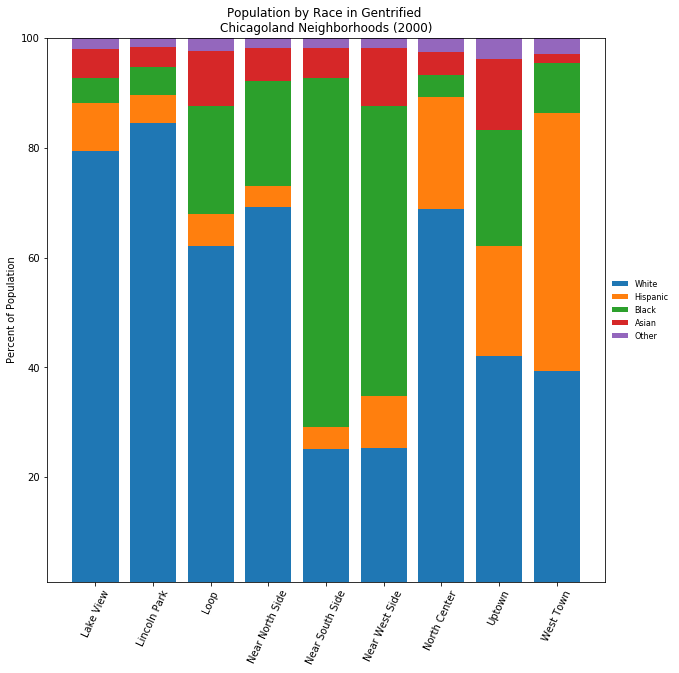

In [60]:
# x axis will be the list of neighborhoods, defined above in the list variable gentrified
plt.figure(figsize=(10,10))

# 2000 Plots
whitePlot2000 = plt.bar(gentrifiedDemos2000["Neighborhood"], gentrifiedDemos2000["avgWhite"])
hispPlot2000 = plt.bar(gentrifiedDemos2000["Neighborhood"], gentrifiedDemos2000["avgHisp"], bottom = gentrifiedDemos2000["avgWhite"])
blackPlot2000 = plt.bar(gentrifiedDemos2000["Neighborhood"], gentrifiedDemos2000["avgBlack"], bottom = gentrifiedDemos2000["avgWhite"] + gentrifiedDemos2000["avgHisp"])
asianPlot2000 = plt.bar(gentrifiedDemos2000["Neighborhood"], gentrifiedDemos2000["avgAsian"], bottom = gentrifiedDemos2000["avgBlack"] + gentrifiedDemos2000["avgWhite"] + gentrifiedDemos2000["avgHisp"])
otherPlot2000 = plt.bar(gentrifiedDemos2000["Neighborhood"], gentrifiedDemos2000["avgOther"], bottom = gentrifiedDemos2000["avgAsian"] + gentrifiedDemos2000["avgBlack"] + gentrifiedDemos2000["avgWhite"] + gentrifiedDemos2000["avgHisp"])

plt.title("Population by Race in Gentrified \nChicagoland Neighborhoods (2000)")
plt.xticks(rotation=65)
plt.ylabel("Percent of Population")
plt.ylim(1, 100)
plt.legend((whitePlot2000[0], hispPlot2000[0], blackPlot2000[0], asianPlot2000[0], otherPlot2000[0]), (labels), fontsize=8, ncol=1, framealpha=0, fancybox=True, loc='center left', bbox_to_anchor=(1, 0.5))

gentrifiedDemos2000 = gentrifiedDemos2000.sort_values("Neighborhood")

plt.savefig("../../Output/GentrifiedPopulation2000.png")

In [38]:
gentrifiedDemos2000 = gentrifiedDemos2000.sort_values("Neighborhood")

In [39]:
gentrifiedDemos2010 = gentrifiedDemos2010.sort_values("Neighborhood")

In [40]:
gentrifiedDemos2018 = gentrifiedDemos2018.sort_values("Neighborhood")

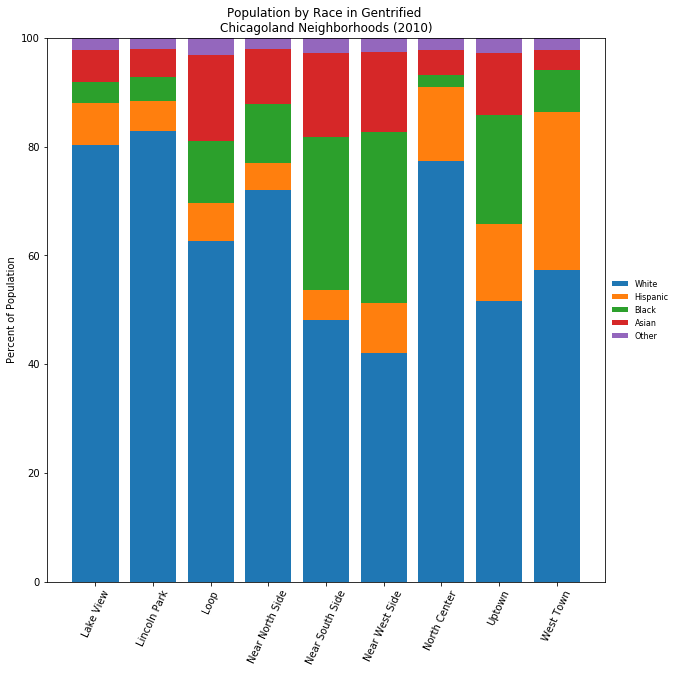

In [41]:
plt.figure(figsize=(10,10))

# 2010 Plots
whitePlot = plt.bar(gentrifiedDemos2010["Neighborhood"], gentrifiedDemos2010["avgWhite"])
hispPlot = plt.bar(gentrifiedDemos2010["Neighborhood"], gentrifiedDemos2010["avgHisp"], bottom = gentrifiedDemos2010["avgWhite"])
blackPlot = plt.bar(gentrifiedDemos2010["Neighborhood"], gentrifiedDemos2010["avgBlack"], bottom = gentrifiedDemos2010["avgWhite"] + gentrifiedDemos2010["avgHisp"])
asianPlot = plt.bar(gentrifiedDemos2010["Neighborhood"], gentrifiedDemos2010["avgAsian"], bottom = gentrifiedDemos2010["avgBlack"] + gentrifiedDemos2010["avgWhite"] + gentrifiedDemos2010["avgHisp"])
otherPlot = plt.bar(gentrifiedDemos2010["Neighborhood"], gentrifiedDemos2010["avgOther"], bottom = gentrifiedDemos2010["avgAsian"] + gentrifiedDemos2010["avgBlack"] + gentrifiedDemos2010["avgWhite"] + gentrifiedDemos2010["avgHisp"])


plt.title("Population by Race in Gentrified \nChicagoland Neighborhoods (2010)")
plt.xticks(rotation=65)
plt.ylabel("Percent of Population")
plt.ylim(0,100)
plt.legend((whitePlot[0], hispPlot[0], blackPlot[0], asianPlot[0], otherPlot[0]), (labels), fontsize=8, ncol=1, framealpha=0, fancybox=True,loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("../../Output/GentrifiedPopulation2010.png")

In [42]:
gentrifiedDemos2018

,Neighborhood,Total Population,White,Hispanic,Black,Asian,Other,avgWhite,avgHisp,avgBlack,avgAsian,avgOther
37,Lake View,99876.0,78859.0,8099.0,3320.0,6735.0,2863.0,78.956907,8.109055,3.324122,6.743362,2.866555
38,Lincoln Park,67260.0,53151.0,4675.0,3134.0,4243.0,2057.0,79.023194,6.950639,4.659530,6.308356,3.058281
65,Loop,35010.0,21691.0,2115.0,4003.0,6162.0,1039.0,61.956584,6.041131,11.433876,17.600686,2.967724
46,Near North Side,86343.0,62243.0,4627.0,7376.0,9906.0,2191.0,72.088067,5.358859,8.542673,11.472847,2.537554
47,Near South Side,23190.0,10433.0,1243.0,5488.0,5375.0,651.0,44.989219,5.360069,23.665373,23.178094,2.807245
48,Near West Side,62560.0,26071.0,6105.0,18559.0,10267.0,1558.0,41.673593,9.758632,29.665921,16.411445,2.490409
50,North Center,34942.0,26996.0,4378.0,713.0,1563.0,1292.0,77.259459,12.529334,2.040524,4.473127,3.697556
66,Uptown,56296.0,30456.0,7468.0,10970.0,5773.0,1629.0,54.099758,13.265596,19.486287,10.254725,2.893634
75,West Town,85307.0,50366.0,22561.0,6565.0,3464.0,2351.0,59.040876,26.446833,7.695734,4.060628,2.755929


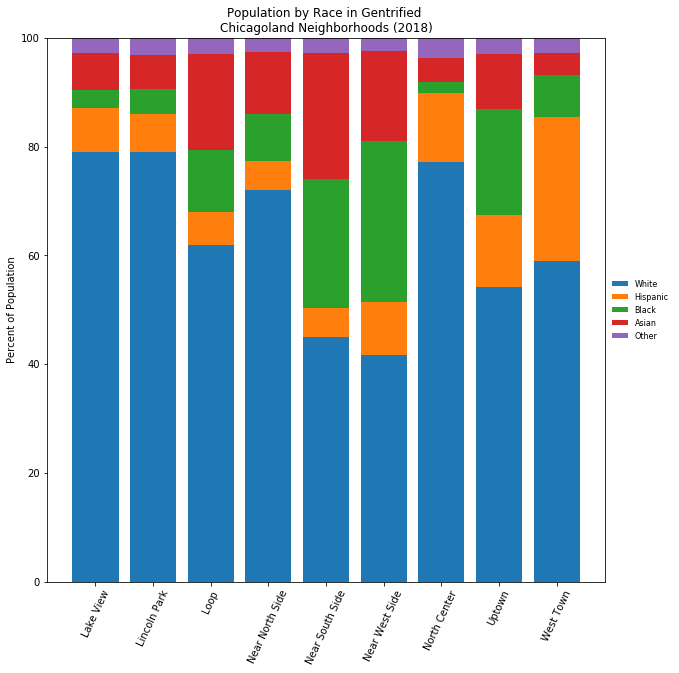

In [43]:
plt.figure(figsize=(10,10))

# 2018 Plots
whitePlot = plt.bar(gentrifiedDemos2018["Neighborhood"], gentrifiedDemos2018["avgWhite"])
hispPlot = plt.bar(gentrifiedDemos2018["Neighborhood"], gentrifiedDemos2018["avgHisp"], bottom = gentrifiedDemos2018["avgWhite"])
blackPlot = plt.bar(gentrifiedDemos2018["Neighborhood"], gentrifiedDemos2018["avgBlack"], bottom = gentrifiedDemos2018["avgWhite"] + gentrifiedDemos2018["avgHisp"])
asianPlot = plt.bar(gentrifiedDemos2018["Neighborhood"], gentrifiedDemos2018["avgAsian"], bottom = gentrifiedDemos2018["avgBlack"] + gentrifiedDemos2018["avgWhite"] + gentrifiedDemos2018["avgHisp"])
otherPlot = plt.bar(gentrifiedDemos2018["Neighborhood"], gentrifiedDemos2018["avgOther"], bottom = gentrifiedDemos2018["avgAsian"] + gentrifiedDemos2018["avgBlack"] + gentrifiedDemos2018["avgWhite"] + gentrifiedDemos2018["avgHisp"])

plt.title("Population by Race in Gentrified \nChicagoland Neighborhoods (2018)")
plt.xticks(rotation=65)
plt.ylabel("Percent of Population")
plt.ylim(0,100)
plt.legend((whitePlot[0], hispPlot[0], blackPlot[0], asianPlot[0], otherPlot[0]), (["White", "Hispanic", "Black", "Asian", "Other"]), fontsize=8, ncol=1, framealpha=0, fancybox=True,loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("../../Output/GentrifiedPopulation2018.png")

In [44]:
#Filter 2000 demographics to see gentrified neighborhoods
notGentrifiedDemos2000 = demos2000[demos2000["Neighborhood"].isin(notGentrified)]
notGentrifiedDemos2000 = notGentrifiedDemos2000.sort_values("Neighborhood")

#Filter 2010 demographics to see gentrified neighborhoods
notGentrifiedDemos2010 = demos2010[demos2010['Neighborhood'].isin(notGentrified)]
notGentrifiedDemos2010 = notGentrifiedDemos2010.sort_values("Neighborhood")


#Filter 2018 demographics to see gentrified neighborhoods
notGentrifiedDemos2018 = demos2018[demos2018['Neighborhood'].isin(notGentrified)]
notGentrifiedDemos2018 = notGentrifiedDemos2018.sort_values("Neighborhood")

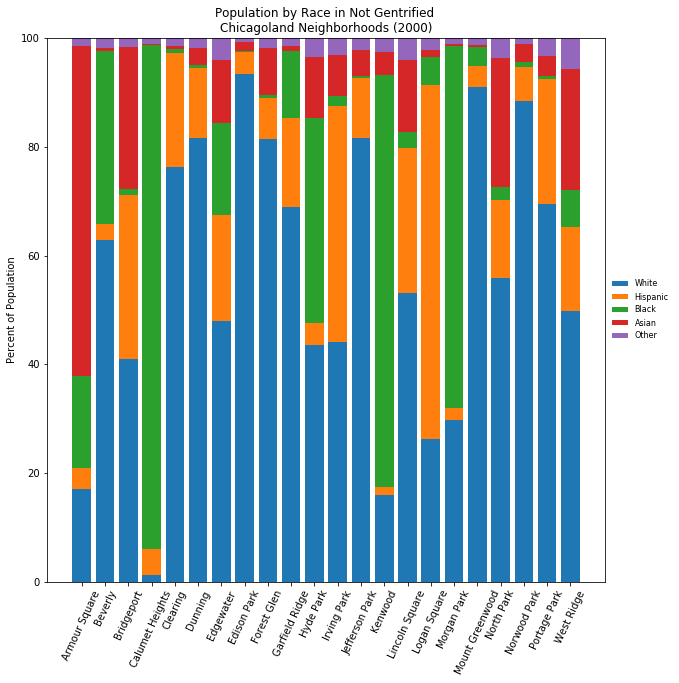

In [45]:
plt.figure(figsize=(10,10))

# 2000 Calculations and Plots
avgWhite = notGentrifiedDemos2000["White"]/notGentrifiedDemos2000["Total Population"]*100
avgHisp = notGentrifiedDemos2000["Hispanic"]/notGentrifiedDemos2000["Total Population"]*100
avgBlack = notGentrifiedDemos2000["Black"]/notGentrifiedDemos2000["Total Population"]*100
avgAsian = notGentrifiedDemos2000["Asian"]/notGentrifiedDemos2000["Total Population"]*100
avgOther = notGentrifiedDemos2000["Other"]/notGentrifiedDemos2000["Total Population"]*100

notGentrifiedDemos2000["avgWhite"] = avgWhite
notGentrifiedDemos2000["avgHisp"] = avgHisp
notGentrifiedDemos2000["avgBlack"] = avgBlack 
notGentrifiedDemos2000["avgAsian"] = avgAsian
notGentrifiedDemos2000["avgOther"] = avgOther


whitePlot = plt.bar(notGentrifiedDemos2000["Neighborhood"], notGentrifiedDemos2000["avgWhite"])
hispPlot = plt.bar(notGentrifiedDemos2000["Neighborhood"], notGentrifiedDemos2000["avgHisp"], bottom = notGentrifiedDemos2000["avgWhite"])
blackPlot = plt.bar(notGentrifiedDemos2000["Neighborhood"], notGentrifiedDemos2000["avgBlack"], bottom = notGentrifiedDemos2000["avgWhite"] + notGentrifiedDemos2000["avgHisp"])
asianPlot = plt.bar(notGentrifiedDemos2000["Neighborhood"], notGentrifiedDemos2000["avgAsian"], bottom = notGentrifiedDemos2000["avgBlack"] + notGentrifiedDemos2000["avgWhite"] + notGentrifiedDemos2000["avgHisp"])
otherPlot = plt.bar(notGentrifiedDemos2000["Neighborhood"], notGentrifiedDemos2000["avgOther"], bottom = notGentrifiedDemos2000["avgAsian"] + notGentrifiedDemos2000["avgBlack"] + notGentrifiedDemos2000["avgWhite"] + notGentrifiedDemos2000["avgHisp"])

plt.title("Population by Race in Not Gentrified \nChicagoland Neighborhoods (2000)")
plt.xticks(rotation=65)
plt.ylabel("Percent of Population")
plt.ylim(0,100)
plt.legend((whitePlot[0], hispPlot[0], blackPlot[0], asianPlot[0], otherPlot[0]), (["White", "Hispanic", "Black", "Asian", "Other"]), fontsize=8, ncol=1, framealpha=0, fancybox=True,loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("../../Output/NotGentrifiedPopulation2000.png")

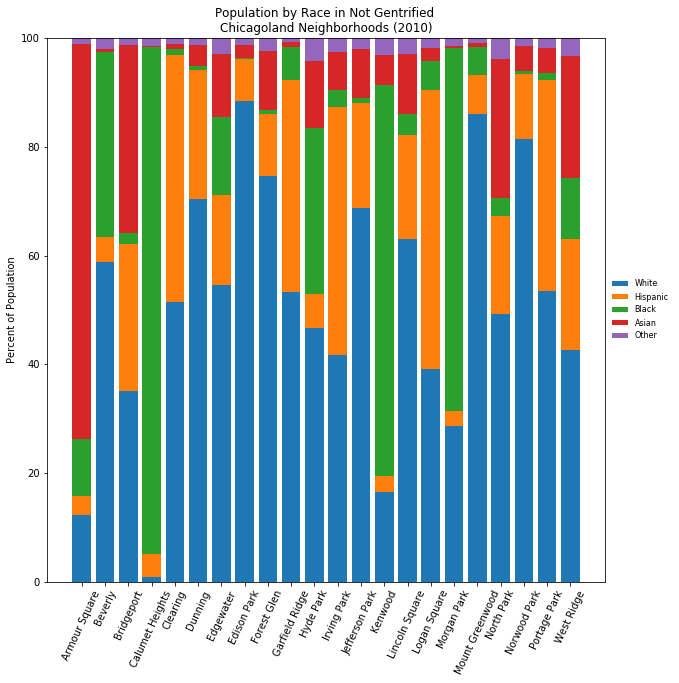

In [46]:
plt.figure(figsize=(10,10))

# 2000 Calculations and Plots
avgWhite = notGentrifiedDemos2010["White"]/notGentrifiedDemos2010["Total Population"]*100
avgHisp = notGentrifiedDemos2010["Hispanic"]/notGentrifiedDemos2010["Total Population"]*100
avgBlack = notGentrifiedDemos2010["Black"]/notGentrifiedDemos2010["Total Population"]*100
avgAsian = notGentrifiedDemos2010["Asian"]/notGentrifiedDemos2010["Total Population"]*100
avgOther = notGentrifiedDemos2010["Other"]/notGentrifiedDemos2010["Total Population"]*100

notGentrifiedDemos2010["avgWhite"] = avgWhite
notGentrifiedDemos2010["avgHisp"] = avgHisp
notGentrifiedDemos2010["avgBlack"] = avgBlack 
notGentrifiedDemos2010["avgAsian"] = avgAsian
notGentrifiedDemos2010["avgOther"] = avgOther


whitePlot = plt.bar(notGentrifiedDemos2010["Neighborhood"], notGentrifiedDemos2010["avgWhite"])
hispPlot  = plt.bar(notGentrifiedDemos2010["Neighborhood"], notGentrifiedDemos2010["avgHisp"],  bottom = notGentrifiedDemos2010["avgWhite"])
blackPlot = plt.bar(notGentrifiedDemos2010["Neighborhood"], notGentrifiedDemos2010["avgBlack"], bottom = notGentrifiedDemos2010["avgWhite"] + notGentrifiedDemos2010["avgHisp"])
asianPlot = plt.bar(notGentrifiedDemos2010["Neighborhood"], notGentrifiedDemos2010["avgAsian"], bottom = notGentrifiedDemos2010["avgBlack"] + notGentrifiedDemos2010["avgWhite"] + notGentrifiedDemos2010["avgHisp"])
otherPlot = plt.bar(notGentrifiedDemos2010["Neighborhood"], notGentrifiedDemos2010["avgOther"], bottom = notGentrifiedDemos2010["avgAsian"] + notGentrifiedDemos2010["avgBlack"] + notGentrifiedDemos2010["avgWhite"] + notGentrifiedDemos2010["avgHisp"])

plt.title("Population by Race in Not Gentrified \nChicagoland Neighborhoods (2010)")
plt.xticks(rotation=65)
plt.ylabel("Percent of Population")
plt.ylim(0,100)
plt.legend((whitePlot[0], hispPlot[0], blackPlot[0], asianPlot[0], otherPlot[0]), (["White", "Hispanic", "Black", "Asian", "Other"]), fontsize=8, ncol=1, framealpha=0, fancybox=True,loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("../../Output/NotGentrifiedPopulation2010.png")

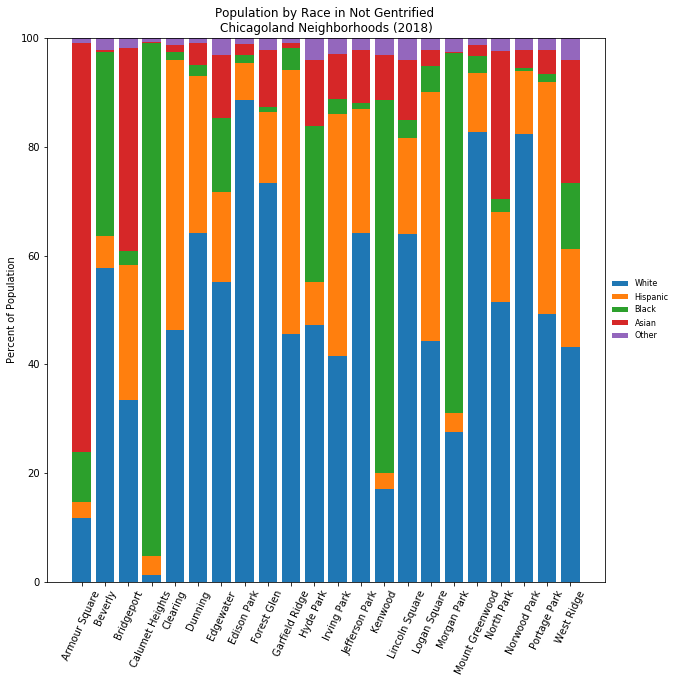

In [47]:
plt.figure(figsize=(10,10))

# 2000 Calculations and Plots
avgWhite = notGentrifiedDemos2018["White"]/notGentrifiedDemos2018["Total Population"]*100
avgHisp = notGentrifiedDemos2018["Hispanic"]/notGentrifiedDemos2018["Total Population"]*100
avgBlack = notGentrifiedDemos2018["Black"]/notGentrifiedDemos2018["Total Population"]*100
avgAsian = notGentrifiedDemos2018["Asian"]/notGentrifiedDemos2018["Total Population"]*100
avgOther = notGentrifiedDemos2018["Other"]/notGentrifiedDemos2018["Total Population"]*100

notGentrifiedDemos2018["avgWhite"] = avgWhite
notGentrifiedDemos2018["avgHisp"] = avgHisp
notGentrifiedDemos2018["avgBlack"] = avgBlack 
notGentrifiedDemos2018["avgAsian"] = avgAsian
notGentrifiedDemos2018["avgOther"] = avgOther


whitePlot = plt.bar(notGentrifiedDemos2018["Neighborhood"], notGentrifiedDemos2018["avgWhite"])
hispPlot  = plt.bar(notGentrifiedDemos2018["Neighborhood"], notGentrifiedDemos2018["avgHisp"],  bottom = notGentrifiedDemos2018["avgWhite"])
blackPlot = plt.bar(notGentrifiedDemos2018["Neighborhood"], notGentrifiedDemos2018["avgBlack"], bottom = notGentrifiedDemos2018["avgWhite"] + notGentrifiedDemos2018["avgHisp"])
asianPlot = plt.bar(notGentrifiedDemos2018["Neighborhood"], notGentrifiedDemos2018["avgAsian"], bottom = notGentrifiedDemos2018["avgBlack"] + notGentrifiedDemos2018["avgWhite"] + notGentrifiedDemos2018["avgHisp"])
otherPlot = plt.bar(notGentrifiedDemos2018["Neighborhood"], notGentrifiedDemos2018["avgOther"], bottom = notGentrifiedDemos2018["avgAsian"] + notGentrifiedDemos2018["avgBlack"] + notGentrifiedDemos2018["avgWhite"] + notGentrifiedDemos2018["avgHisp"])

plt.title("Population by Race in Not Gentrified \nChicagoland Neighborhoods (2018)")
plt.xticks(rotation=65)
plt.ylabel("Percent of Population")
plt.ylim(0,100)
plt.legend((whitePlot[0], hispPlot[0], blackPlot[0], asianPlot[0], otherPlot[0]), (["White", "Hispanic", "Black", "Asian", "Other"]), fontsize=8, ncol=1, framealpha=0, fancybox=True,loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("../../Output/NotGentrifiedPopulation2018.png")

In [6]:
# fbi_codex Needed to index Crime Reports into summary categories
fbi_codex = pd.read_csv('../../Resources/fbi_codex.csv')
fbi_index = fbi_codex[['fbi_Crime_type','fbi_code_key','ds_fbi_group']]
fbi_index = fbi_index.dropna()

# gent_codex Needed to index Crime Reports into summary categories
gent_codex = pd.read_csv('../../Resources/UIC_gentrification_index_neighborhood_list_final.csv')
gent_concat = gent_codex["Type"].str.split(" - ", n = 1, expand = True) 
gent_codex["Classification"] = gent_concat[1]
gent_codex["Class_Code"] = gent_concat[0]
gent_fin = gent_codex.rename(columns={"No.": "community_area"})

# cca_codex will allow us to convert raw crime into a crime rate for 2010 and an approzimation for 2002
cca_codex = pd.read_csv('../../Resources/ReferenceCCA20102014.csv')

# cca_codex2018 will allow us to convert raw crime into a crime rate for 2018

cca_codex2018 = pd.read_csv('../../Resources/DemoData2018.csv')

# display all imported csvs so we can remember what we're working with later
display(fbi_index.head())
display(gent_fin.head())
display(cca_codex.head())
display(cca_codex2018.head())

KeyError: "['fbi_Crime_type' 'fbi_code_key' 'ds_fbi_group'] not in index"

In [ ]:
results = client.get("6zsd-86xi", year=2002, limit=400000)
results_df = pd.DataFrame.from_records(results) # Convert to pandas DataFrame # results_df.head()
start_results = results_df[['community_area','fbi_code','date','description','latitude','longitude','primary_type','year']]
start_results['community_area'] = pd.to_numeric(start_results['community_area'], errors='coerce')
start_format = start_results.sort_values('community_area')
start_format.to_csv('../../Output/start_tfile.csv')    
start_format.head()


In [ ]:
results = client.get("6zsd-86xi", year=2002, limit=400000)
results_df = pd.DataFrame.from_records(results) # Convert to pandas DataFrame # results_df.head()
start_results = results_df[['community_area','fbi_code','date','description','latitude','longitude','primary_type','year']]
start_results['community_area'] = pd.to_numeric(start_results['community_area'], errors='coerce')
start_format = start_results.sort_values('community_area')
start_format.to_csv('../../Output/start_tfile.csv')    
start_format.head()


In [ ]:
b_crimecat_cca_clean = b_crimecat_cca[['community_area', 'Neighborhood', 'fbi_code','fbi_Crime_type', 'ds_fbi_group', 'Classification', 'Class_Code',]]
b_crimecat_cca_group = b_crimecat_cca_clean.groupby(by=['ds_fbi_group','Classification']).count() #relevant_results.sort_values('fbi_code')
crime_reset = b_crimecat_cca_group.reset_index()
print("Count of FBI Crime Categories by Gentrification Pathway")
crime_reset.drop(columns=['community_area', 'Neighborhood', 'fbi_code','fbi_Crime_type',])
crime_reset.pivot(index='Classification', columns='ds_fbi_group', values='Class_Code')


In [ ]:
b_crimecat_cca_clean['Class_Code'] = pd.to_numeric(b_crimecat_cca_clean['Class_Code'], errors='coerce') # b_crimecat_cca_clean.dtypes
ngb1 = b_crimecat_cca_clean.loc[b_crimecat_cca_clean['Class_Code'] < 3]
ngb2 = b_crimecat_cca_clean.loc[b_crimecat_cca_clean['Class_Code'] == 5]
gb6 = b_crimecat_cca_clean.loc[b_crimecat_cca_clean['Class_Code'] == 6]
combo = [ngb1, ngb2]
nGentrified = pd.concat(combo)
nGentrified["DS_Subset"] = "Not Gentrified"
gb6["DS_Subset"] = "Gentrified"
neighborhodtype_bycrime = [nGentrified, gb6]
b_neighbors = pd.concat(neighborhodtype_bycrime)
b_neighbors_reset = b_neighbors.groupby(by=['DS_Subset','Neighborhood','ds_fbi_group']).count()
b_neighbors_dropem = b_neighbors_reset.reset_index()
b_neighbors_dropem.drop(columns=['Classification','community_area','fbi_code','fbi_Crime_type',], inplace=True)
print("Count of FBI Crime Categories by Gentrification Pathway")
b_neighbors_final = b_neighbors_dropem.groupby(by=['DS_Subset','Neighborhood','ds_fbi_group']).sum().unstack('ds_fbi_group')
base_year_ngdata = b_neighbors_final.reset_index()# .pivot(index='Neighborhood', columns='ds_fbi_group', values='Class_Code')
base_year_ngdata['Total'] = base_year_ngdata.sum(axis=1)
base_year_ngdata.to_csv('report_reference_data/close_year_ngdata.csv')
base_year_ngdata

In [ ]:
midresults = client.get("6zsd-86xi", year=2010, limit=400000)
midresults_df = pd.DataFrame.from_records(midresults) # Convert to pandas DataFrame # results_df.head()
mid_results = midresults_df[['community_area','fbi_code','date','description','latitude','longitude','primary_type','year']]
mid_results['community_area'] = pd.to_numeric(mid_results['community_area'], errors='coerce')
mid_results.groupby(by=['fbi_code']).count() #relevant_results.sort_values('fbi_code')
mid_results.sort_values(['community_area'])
mid_results.to_csv('report_reference_data/mid_tfile.csv')    
mid_results.head()

In [ ]:
midyear_fbiindex = mid_results.merge(fbi_index, left_on='fbi_code', right_on='fbi_code_key')
mid_crimecat_cca = midyear_fbiindex.merge(gent_fin, left_on='community_area', right_on='community_area')
mid_crimecat_cca.to_csv('report_reference_data/mid_crimecat_cca.csv') # display(b_crimecat_cca.columns)
display(mid_crimecat_cca.head())

mid_crimecat_cca_clean = mid_crimecat_cca[['community_area', 'Neighborhood', 'fbi_code','fbi_Crime_type', 'ds_fbi_group', 'Classification', 'Class_Code',]]
mid_crimecat_cca_group = mid_crimecat_cca_clean.groupby(by=['ds_fbi_group','Classification']).count() #relevant_results.sort_values('fbi_code')
mid_crime_reset = mid_crimecat_cca_group.reset_index()
print("Count of FBI Crime Categories by Gentrification Pathway")
mid_crime_reset.drop(columns=['community_area', 'Neighborhood', 'fbi_code','fbi_Crime_type',])
mid_crime_reset.pivot(index='Classification', columns='ds_fbi_group', values='Class_Code')



In [ ]:
mid_crimecat_cca_clean['Class_Code'] = pd.to_numeric(mid_crimecat_cca_clean['Class_Code'], errors='coerce') # b_crimecat_cca_clean.dtypes
ngm1 = mid_crimecat_cca_clean.loc[mid_crimecat_cca_clean['Class_Code'] < 3]
ngm2 = mid_crimecat_cca_clean.loc[mid_crimecat_cca_clean['Class_Code'] == 5]
gm6 = mid_crimecat_cca_clean.loc[mid_crimecat_cca_clean['Class_Code'] == 6]
combo = [ngm1, ngm2]
nGentrifiedm = pd.concat(combo)
nGentrifiedm["DS_Subset"] = "Not Gentrified"
gm6["DS_Subset"] = "Gentrified"
mid_neighborhodtype_bycrime = [nGentrifiedm, gm6]
mid_neighbors = pd.concat(mid_neighborhodtype_bycrime)
mid_neighbors_reset = mid_neighbors.groupby(by=['DS_Subset','Neighborhood','ds_fbi_group']).count()
mid_neighbors_dropem = mid_neighbors_reset.reset_index()
mid_neighbors_dropem.drop(columns=['Classification','community_area','fbi_code','fbi_Crime_type',], inplace=True)
mid_neighbors_dropem



In [ ]:
print("Count of FBI Crime Categories by Gentrification Pathway")
mid_neighbors_final = mid_neighbors_dropem.groupby(by=['DS_Subset','Neighborhood','ds_fbi_group']).sum().unstack('ds_fbi_group')
mid_year_ngdata = mid_neighbors_final.reset_index()# .pivot(index='Neighborhood', columns='ds_fbi_group', values='Class_Code')
mid_year_ngdata['Total'] = mid_year_ngdata.sum(axis=1)
mid_year_ngdata.to_csv('report_reference_data/close_year_ngdata.csv')
mid_year_ngdata

In [ ]:
closeresults = client.get("6zsd-86xi", year=2018, limit=400000)
closeresults_df = pd.DataFrame.from_records(closeresults)                    # Convert to pandas DataFrame # results_df.head()
close_results = closeresults_df[['community_area','fbi_code','date','description', 'latitude','longitude','primary_type','year']]
close_results['community_area'] = pd.to_numeric(close_results['community_area'], errors='coerce')
close_results.groupby(by=['fbi_code']).count() #relevant_results.sort_values('fbi_code')
close_results.to_csv('report_reference_data/close_tfile.csv')    
close_results.head()

In [ ]:
closeyear_fbiindex = close_results.merge(fbi_index, left_on='fbi_code', right_on='fbi_code_key')
close_crimecat_cca = closeyear_fbiindex.merge(gent_fin, left_on='community_area', right_on='community_area')
close_crimecat_cca.to_csv('report_reference_data/close_crimecat_cca.csv') # display(b_crimecat_cca.columns)
display(close_crimecat_cca.head())

close_crimecat_cca_clean = close_crimecat_cca[['community_area', 'Neighborhood', 'fbi_code','fbi_Crime_type', 'ds_fbi_group', 'Classification', 'Class_Code',]]
close_crimecat_cca_group = close_crimecat_cca_clean.groupby(by=['ds_fbi_group','Classification']).count() #relevant_results.sort_values('fbi_code')
close_crime_reset = close_crimecat_cca_group.reset_index()
print("Count of FBI Crime Categories by Gentrification Pathway")
close_crime_reset.drop(columns=['community_area', 'Neighborhood', 'fbi_code','fbi_Crime_type',])
close_crime_reset.pivot(index='Classification', columns='ds_fbi_group', values='Class_Code')


In [ ]:
close_crimecat_cca_clean['Class_Code'] = pd.to_numeric(close_crimecat_cca_clean['Class_Code'], errors='coerce') # b_crimecat_cca_clean.dtypes
ngc1 = close_crimecat_cca_clean.loc[close_crimecat_cca_clean['Class_Code'] < 3]
ngc2 = close_crimecat_cca_clean.loc[close_crimecat_cca_clean['Class_Code'] == 5]
gc6 = close_crimecat_cca_clean.loc[close_crimecat_cca_clean['Class_Code'] == 6]
combo = [ngc1, ngc2]
nGentrifiedc = pd.concat(combo)
nGentrifiedc["DS_Subset"] = "Not Gentrified"
gc6["DS_Subset"] = "Gentrified"
close_neighborhodtype_bycrime = [nGentrifiedc, gc6]
close_neighbors = pd.concat(close_neighborhodtype_bycrime)
close_neighbors_reset = close_neighbors.groupby(by=['DS_Subset','Neighborhood','ds_fbi_group']).count()
close_neighbors_dropem = close_neighbors_reset.reset_index()
close_neighbors_dropem.drop(columns=['Classification','community_area','fbi_code','fbi_Crime_type',], inplace=True)
print("Count of FBI Crime Categories by Gentrification Pathway")
close_neighbors_final = close_neighbors_dropem.groupby(by=['DS_Subset','Neighborhood','ds_fbi_group']).sum().unstack('ds_fbi_group')
close_year_ngdata = close_neighbors_final.reset_index()# .pivot(index='Neighborhood', columns='ds_fbi_group', values='Class_Code')
close_year_ngdata['Total'] = close_year_ngdata.sum(axis=1)
close_year_ngdata.to_csv('report_reference_data/close_year_ngdata.csv')
close_year_ngdata               
                         

In [ ]:
pop_table = cca_codex[['GEOG', '2000_POP','2010_POP','POP_CHANGE']]
# display(cca_codex.head())

pop_table['02_Change_est'] = round(pop_table['POP_CHANGE'] / 5)
pop_table['2002_POP_est'] = pop_table['2000_POP'] + pop_table['02_Change_est']

pop_index = pop_table[['GEOG', '2000_POP','2002_POP_est','2010_POP']]
pop_index['GEOG'] = pop_index['GEOG'].str.replace("The Loop","Loop")


# list(pop_index['GEOG'])

In [ ]:
cca_codex2018.columns

In [ ]:
cca_codex2018_s = cca_codex2018[["GEOG", "TOT_POP"]]
cca_codex2018_s['GEOG'] = cca_codex2018_s['GEOG'].str.replace("The Loop","Loop")
cca_codex2018_name = cca_codex2018_s.rename(columns = {"GEOG": "Neighborhood", "TOT_POP" : "2018_POP"})
cca_codex2018_name.head()

In [ ]:
base_name = base_year_ngdata.rename(columns={"Nonviolent": "Nonviolent_2002", "Violent": "Violent_2002", "White Collar": "White_Collar_2002", "Total":"Total_2002"})
midmerge = mid_year_ngdata.drop(columns=['DS_Subset'])
mid_name = midmerge.rename(columns={"Nonviolent": "Nonviolent_2010", "Violent": "Violent_2010", "White Collar": "White_Collar_2010","Total":"Total_2010"})

closemerge = close_year_ngdata.drop(columns=['DS_Subset'])
close_name = closemerge.rename(columns={"Nonviolent": "Nonviolent_2018", "Violent": "Violent_2018", "White Collar": "White_Collar_2018","Total":"Total_2018"})
#display(base_name.head()) display(mid_name.head()) display(close_name.head())

twoandten = base_name.merge(mid_name, how='left', on='Neighborhood')
twotenandeighteen = twoandten.merge(close_name, how='left', on='Neighborhood')
pop_index_allyr = pop_index.merge(cca_codex2018_name, how='left',  left_on='GEOG', right_on='Neighborhood')
pop_index_allyr_c = pop_index_allyr.drop(columns=['Neighborhood'])

crime_all_yr_merge = twotenandeighteen.merge(pop_index_allyr_c, how='left', left_on='Neighborhood', right_on='GEOG')
crime_all_yr_merge.dtypes

In [ ]:
crime_all_yr_name = crime_all_yr_merge.rename(columns=
                                              {list(crime_all_yr_merge)[0]: "Gentrified_type", list(crime_all_yr_merge)[1]: "Neighborhood", 
                                               list(crime_all_yr_merge)[2]: "Nonviolent_2002", list(crime_all_yr_merge)[3]: "Violent_2002", 
                                               list(crime_all_yr_merge)[4]: "White_Collar_2002",list(crime_all_yr_merge)[5]: "Total_2002", 
                                               list(crime_all_yr_merge)[6]: "Nonviolent_2010", list(crime_all_yr_merge)[7]: "Violent_2010",
                                               list(crime_all_yr_merge)[8]: "White_Collar_2010", list(crime_all_yr_merge)[9]: "Total_2010",
                                               list(crime_all_yr_merge)[10]: "Nonviolent_2018", list(crime_all_yr_merge)[11]: "Violent_2018",
                                               list(crime_all_yr_merge)[12]: "White_Collar_2018", list(crime_all_yr_merge)[13]: "Total_2018",})

crime_all_yr_name['Nonviolent_2002_est_rate'] = (crime_all_yr_name['Nonviolent_2002'] / crime_all_yr_name['2002_POP_est']) * 1000
crime_all_yr_name['Violent_2002_est_rate'] = (crime_all_yr_name['Violent_2002'] / crime_all_yr_name['2002_POP_est']) * 1000
crime_all_yr_name['White_Collar_2002_est_rate'] = (crime_all_yr_name['White_Collar_2002'] / crime_all_yr_name['2002_POP_est']) * 1000
crime_all_yr_name['Total_2002_est_rate'] = (crime_all_yr_name['Total_2002'] / crime_all_yr_name['2002_POP_est']) * 1000
crime_all_yr_name['Nonviolent_2010_rate'] = (crime_all_yr_name['Nonviolent_2010'] / crime_all_yr_name['2010_POP']) * 1000
crime_all_yr_name['Violent_2010_rate'] = (crime_all_yr_name['Violent_2010'] / crime_all_yr_name['2010_POP']) * 1000
crime_all_yr_name['White_Collar_2010_rate'] = (crime_all_yr_name['White_Collar_2010'] / crime_all_yr_name['2010_POP']) * 1000
crime_all_yr_name['Total_2010_rate'] = (crime_all_yr_name['Total_2010'] / crime_all_yr_name['2010_POP']) * 1000

crime_all_yr_name['Nonviolent_2018_rate'] = (crime_all_yr_name['Nonviolent_2018'] / crime_all_yr_name['2018_POP']) * 1000
crime_all_yr_name['Violent_2018_rate'] = (crime_all_yr_name['Violent_2018'] / crime_all_yr_name['2018_POP']) * 1000
crime_all_yr_name['White_Collar_2018_rate'] = (crime_all_yr_name['White_Collar_2018'] / crime_all_yr_name['2018_POP']) * 1000
crime_all_yr_name['Total_2018_rate'] = (crime_all_yr_name['Total_2018'] / crime_all_yr_name['2018_POP']) * 1000

crime_all_yr_name.to_csv('report_reference_data/crimeby_neighborhood_years_count.csv')
display(crime_all_yr_name.head(30))

In [ ]:
crime_all_yr = twotenandeighteen.iloc[:,[0,1,2,6,10,3,7,11,4,8,12]]

gentrified_crime = twotenandeighteen[twotenandeighteen['DS_Subset'] == 'Gentrified']
not_gentrified_crime = twotenandeighteen[twotenandeighteen['DS_Subset'] == 'Not Gentrified']

gentrified_nonviolent_yr = gentrified_crime.iloc[:,[0,1,2,6,10]]
gentrified_violent_yr = gentrified_crime.iloc[:,[0,1,3,7,11]]
gentrified_whitecollar_yr = gentrified_crime.iloc[:,[0,1,4,8,12]]
                                    
not_gentrified_nonviolent_yr = not_gentrified_crime.iloc[:,[0,1,2,6,10]]
not_gentrified_violent_yr = not_gentrified_crime.iloc[:,[0,1,3,7,11]]
not_gentrified_whitecollar_yr = not_gentrified_crime.iloc[:,[0,1,4,8,12]]

display(crime_all_yr)
display(gentrified_nonviolent_yr)
display(not_gentrified_nonviolent_yr)
display(gentrified_violent_yr)
display(not_gentrified_violent_yr)
display(gentrified_whitecollar_yr)
display(not_gentrified_whitecollar_yr)

display(gentrified_crime) 
display(not_gentrified_crime) 

In [ ]:
gentrified_crime_rate = crime_all_yr_name[crime_all_yr_name['Gentrified_type'] == 'Gentrified']
not_gentrified_crime_rate = crime_all_yr_name[crime_all_yr_name['Gentrified_type'] == 'Not Gentrified']

display(gentrified_crime_rate)
display(not_gentrified_crime_rate)

In [ ]:
gentrified_crime_rate_yr = gentrified_crime_rate.iloc[:,[19,23,27,
                                                         20,24,28,
                                                         21,25,29
                                                         ]]

not_gentrified_crime_rate_yr = not_gentrified_crime_rate.iloc[:,[19,23,27,
                                                         20,24,28,
                                                         21,25,29
                                                         ]]

print('Gentrified Neighborhood Crime Rates')
display(gentrified_crime_rate_yr.describe())
gentrified_crime_rate_yr.to_csv('output_reports_figures/gentrified_crime_rate_yr.csv')
print('Not Gentrified Neighborhood Crime Rates')
display(not_gentrified_crime_rate_yr.describe())
not_gentrified_crime_rate_yr.to_csv('output_reports_figures/not_gentrified_crime_rate_yr.csv')


In [ ]:
crimerate_nonviolent_g = pd.melt(gentrified_crime_rate, id_vars=['Gentrified_type'], value_vars=['Nonviolent_2002_est_rate','Nonviolent_2010_rate','Nonviolent_2018_rate'])
crimerate_violent_g = pd.melt(gentrified_crime_rate, id_vars=['Gentrified_type'], value_vars=['Violent_2002_est_rate','Violent_2010_rate','Violent_2018_rate'])
crimerate_white_collar_g = pd.melt(gentrified_crime_rate, id_vars=['Gentrified_type'], value_vars=['White_Collar_2002_est_rate','White_Collar_2010_rate','White_Collar_2018_rate'])

crimerate_nonviolent_ng = pd.melt(not_gentrified_crime_rate, id_vars=['Gentrified_type'], value_vars=['Nonviolent_2002_est_rate','Nonviolent_2010_rate','Nonviolent_2018_rate'])
crimerate_violent_ng = pd.melt(not_gentrified_crime_rate, id_vars=['Gentrified_type'], value_vars=['Violent_2002_est_rate','Violent_2010_rate','Violent_2018_rate'])
crimerate_white_collar_ng = pd.melt(not_gentrified_crime_rate, id_vars=['Gentrified_type'], value_vars=['White_Collar_2002_est_rate','White_Collar_2010_rate','White_Collar_2018_rate'])
crimerate_nonviolent_g

In [ ]:
crimerate_nonviolent_g.boxplot("value", by="variable", notch=True, patch_artist=True, figsize=(20, 10))

plt.title('Nonviolent Crime Rate in Gentrified Neighborhoods', fontsize=20)
plt.suptitle("")

plt.xlabel('Year', fontsize=20)
plt.ylabel('Crime Rate (per 1,000)', fontsize=20)
 
# Limits for the Y axis
bars = ('','2002 est', '2010', '2018','')
y_pos = np.arange(len(bars))
    
# Create names
plt.xticks(y_pos, bars, fontsize=14)
plt.ylim(top=70)

# Export graphic
plt.savefig('../../Output/gentrified_nonviolentcrime_bxplt.png')

In [ ]:
crimerate_violent_g.boxplot("value", by="variable", notch=True, patch_artist=True, figsize=(20, 10))

plt.title('Violent Crime Rate in Gentrified Neighborhoods', fontsize=20)
plt.suptitle("")

plt.xlabel('Year', fontsize=20)
plt.ylabel('Crime Rate (per 1,000)', fontsize=20)
 
# Limits for the Y axis
bars = ('','2002 est', '2010', '2018','')
y_pos = np.arange(len(bars))

 
# Create names
plt.xticks(y_pos, bars, fontsize=14)
plt.ylim(top=50)
 
# Export graphic
plt.savefig('../../Output/gentrified_violentcrime_bxplt.png')

In [ ]:
crimerate_white_collar_g.boxplot("value", by="variable",notch=True, patch_artist=True,  figsize=(20, 10))

plt.title('White Collar Crime Rate in Gentrified Neighborhoods', fontsize=20)
plt.suptitle("")

plt.xlabel('Year', fontsize=20)
plt.ylabel('Crime Rate (per 1,000)', fontsize=20)
 
# Limits for the Y axis
bars = ('','2002 est', '2010', '2018','')
y_pos = np.arange(len(bars))

 
# Create names
plt.xticks(y_pos, bars, fontsize=14)
plt.ylim(top=50)

# Export graphic
plt.savefig('../../Output/gentrified_whitecollar_bxplt.png')

In [ ]:
crimerate_nonviolent_ng.boxplot("value", by="variable", notch=True, patch_artist=True, figsize=(20, 10))

plt.title('Nonviolent Crime Rate in Non-Gentrified Neighborhoods', fontsize=20)
plt.suptitle("")

plt.xlabel('Year', fontsize=20)
plt.ylabel('Crime Rate (per 1,000)', fontsize=20)
 
# Limits for the Y axis
bars = ('','2002 est', '2010', '2018','')
y_pos = np.arange(len(bars))

 
# Create names
plt.xticks(y_pos, bars, fontsize=14)
plt.ylim(top=50)

# Export graphic
plt.savefig('../../Output/nongentrified_nonviolent_bxplt.png')

In [ ]:
crimerate_violent_ng.boxplot("value", by="variable", notch=True, patch_artist=True, figsize=(20, 10))

plt.title('Violent Crime Rate in Non-Gentrified Neighborhoods', fontsize=20)
plt.suptitle("")

plt.xlabel('Year', fontsize=20)
plt.ylabel('Crime Rate (per 1,000)', fontsize=20)
 
# Limits for the Y axis
bars = ('','2002 est', '2010', '2018','')
y_pos = np.arange(len(bars))

# Create names
plt.xticks(y_pos, bars, fontsize=14)
plt.ylim(top=50)

# Export graphic
plt.savefig('../../Output/nongentrified_violent_bxplt.png')

In [ ]:
crimerate_white_collar_ng.boxplot("value", by="variable", notch=True, patch_artist=True, figsize=(20, 10))

plt.title('White Collar Crime Rate in Non-Gentrified Neighborhoods', fontsize=20)
plt.suptitle("")

plt.xlabel('Year', fontsize=20)
plt.ylabel('Crime Rate (per 1,000)', fontsize=20)
 
# Limits for the Y axis
bars = ('','2002 est', '2010', '2018','')
y_pos = np.arange(len(bars))

 
# Create names
plt.xticks(y_pos, bars)
plt.ylim(top=50)

# Export graphic
plt.savefig('../../Output/nongentrified_whitecollar._bxplt.png')

In [ ]:
crimerate_all_yr = crime_all_yr_name.iloc[:,[0,1,16,17,18,19,23,27,20,24,28,21,25,29]]

#display(crime_all_yr_name.columns[[0,1,18,22,19,23,20,24,21,25]])
display(crimerate_all_yr)
crimerate_all_yr.to_csv('output_reports_figures/crimerate_all_yr.csv')

In [ ]:
Nonviolent_2002_gentrified = crimerate_all_yr[crimerate_all_yr["Gentrified_type"] == "Gentrified"]["Nonviolent_2002_est_rate"]
Nonviolent_2010_gentrified = crimerate_all_yr[crimerate_all_yr["Gentrified_type"] == "Gentrified"]["Nonviolent_2010_rate"]
Nonviolent_2018_gentrified = crimerate_all_yr[crimerate_all_yr["Gentrified_type"] == "Gentrified"]["Nonviolent_2018_rate"]
Nonviolent_gentrified_f_val, Nonviolent_gentrified_p_val = stats.f_oneway(Nonviolent_2002_gentrified, Nonviolent_2010_gentrified, Nonviolent_2018_gentrified)

Violent_2002_gentrified = crimerate_all_yr[crimerate_all_yr["Gentrified_type"] == "Gentrified"]["Violent_2002_est_rate"]
Violent_2010_gentrified = crimerate_all_yr[crimerate_all_yr["Gentrified_type"] == "Gentrified"]["Violent_2010_rate"]
Violent_2018_gentrified = crimerate_all_yr[crimerate_all_yr["Gentrified_type"] == "Gentrified"]["Violent_2018_rate"]
Violent_gentrified_f_val, Violent_gentrified_p_val = stats.f_oneway(Violent_2002_gentrified, Violent_2010_gentrified, Violent_2018_gentrified)

White_Collar_2002_gentrified = crimerate_all_yr[crimerate_all_yr["Gentrified_type"] == "Gentrified"]["White_Collar_2002_est_rate"]
White_Collar_2010_gentrified = crimerate_all_yr[crimerate_all_yr["Gentrified_type"] == "Gentrified"]["White_Collar_2010_rate"]
White_Collar_2018_gentrified = crimerate_all_yr[crimerate_all_yr["Gentrified_type"] == "Gentrified"]["White_Collar_2018_rate"]
White_Collar_gentrified_f_val, White_Collar_gentrified_p_val = stats.f_oneway(White_Collar_2002_gentrified, White_Collar_2010_gentrified, White_Collar_2018_gentrified)

Nonviolent_2002_not_gentrified = crimerate_all_yr[crimerate_all_yr["Gentrified_type"] == "Not Gentrified"]["Nonviolent_2002_est_rate"]
Nonviolent_2010_not_gentrified = crimerate_all_yr[crimerate_all_yr["Gentrified_type"] == "Not Gentrified"]["Nonviolent_2010_rate"]
Nonviolent_2018_not_gentrified = crimerate_all_yr[crimerate_all_yr["Gentrified_type"] == "Not Gentrified"]["Nonviolent_2018_rate"]
Nonviolent_not_gentrified_f_val, Nonviolent_not_gentrified_p_val = stats.f_oneway(Nonviolent_2002_not_gentrified, 
                                                                                  Nonviolent_2010_not_gentrified, 
                                                                                  Nonviolent_2018_not_gentrified)

Violent_2002_not_gentrified = crimerate_all_yr[crimerate_all_yr["Gentrified_type"] == "Not Gentrified"]["Violent_2002_est_rate"]
Violent_2010_not_gentrified = crimerate_all_yr[crimerate_all_yr["Gentrified_type"] == "Not Gentrified"]["Violent_2010_rate"]
Violent_2018_not_gentrified = crimerate_all_yr[crimerate_all_yr["Gentrified_type"] == "Not Gentrified"]["Violent_2018_rate"]
Violent_not_gentrified_f_val, Violent_not_gentrified_p_val = stats.f_oneway(Violent_2002_not_gentrified, 
                                                                            Violent_2010_not_gentrified, 
                                                                            Violent_2018_not_gentrified)

White_Collar_2002_not_gentrified = crimerate_all_yr[crimerate_all_yr["Gentrified_type"] == "Not Gentrified"]["White_Collar_2002_est_rate"]
White_Collar_2010_not_gentrified = crimerate_all_yr[crimerate_all_yr["Gentrified_type"] == "Not Gentrified"]["White_Collar_2010_rate"]
White_Collar_2018_not_gentrified = crimerate_all_yr[crimerate_all_yr["Gentrified_type"] == "Not Gentrified"]["White_Collar_2018_rate"]
White_Collar_not_gentrified_f_val, White_Collar_not_gentrified_p_val = stats.f_oneway(White_Collar_2002_not_gentrified, 
                                                                                      White_Collar_2010_not_gentrified, 
                                                                                      White_Collar_2018_not_gentrified)


neighborhoodcrime_anova = pd.DataFrame( {"F-Statistic" : [Nonviolent_gentrified_f_val, 
                                     Violent_gentrified_f_val,
                                     White_Collar_gentrified_f_val,
                                    Nonviolent_not_gentrified_f_val,
                                     Violent_not_gentrified_f_val,
                                     White_Collar_not_gentrified_f_val,
                                    ] ,
                    "P-Value" : [Nonviolent_gentrified_p_val, 
                                 Violent_gentrified_p_val,
                                White_Collar_gentrified_p_val,
                                 Nonviolent_not_gentrified_p_val,
                                 Violent_not_gentrified_p_val,
                                 White_Collar_not_gentrified_p_val,
                                ]}, 
                      index = ['Nonviolent_gentrified', 
                               'Violent_gentrified',
                               'White_Collar_gentrified',
                               'Nonviolent_not_gentrified', 
                               'Violent_not_gentrified',
                               'White_Collar_not_gentrified',])
neighborhoodcrime_anova
neighborhoodcrime_anova.to_csv('output_reports_figures/neighborhoodcrime_anova.csv')